<a href="https://colab.research.google.com/github/sankar-ramamoorthy/DL/blob/main/SentimentAnalyser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://neptune.ai/blog/10-nlp-projects

https://github.com/koosha-t/Sentiment-Analysis-NLP-for-Marketting


Arnab Som
Sankar Ramamoorthy

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

Version 0. 20230514

In [ ]:
pip install nltk

  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Using cached regex-2023.5.5-cp310-cp310-macosx_11_0_arm64.whl (288 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 6.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 34.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.7/229.7 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 13.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%%shell
pip install ndjson

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from nltk import sent_tokenize, pos_tag
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.sentiment.util import mark_negation
from nltk import punkt
from string import punctuation
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import json
import gzip
import pandas as pd
from urllib.request import urlopen
import random
import numpy as np
from tqdm import tqdm_notebook as tqdm
from collections import defaultdict
import ndjson
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/arnabsom/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/arnabsom/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/arnabsom/nltk_data...


True

In [ ]:
nltk.download('sentiwordnet')

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /Users/arnabsom/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


True

In [ ]:
def penn_to_wn(tag):
    """
        Convert between the PennTreebank tags to simple Wordnet tags
    """
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

In [ ]:
def get_sentiment_score(text):
    
    """
        This method returns the sentiment score of a given text using SentiWordNet sentiment scores.
        input: text
        output: numeric (double) score, >0 means positive sentiment and <0 means negative sentiment.
    """    
    total_score = 0
    #print(text)
    raw_sentences = sent_tokenize(text)
    #print(raw_sentences)
    
    for sentence in raw_sentences:

        sent_score = 0     
        sentence = str(sentence)
        #print(sentence)
        sentence = sentence.replace("<br />"," ").translate(str.maketrans('','',punctuation)).lower()
        tokens = TreebankWordTokenizer().tokenize(text)
        tags = pos_tag(tokens)
        for word, tag in tags:
            wn_tag = penn_to_wn(tag)
            if not wn_tag:
                continue
            lemma = WordNetLemmatizer().lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                continue
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sent_score += swn_synset.pos_score() - swn_synset.neg_score()

        total_score = total_score + (sent_score / len(tokens))

    
    return (total_score / len(raw_sentences)) * 100

In [ ]:
# reading reviews from json file
with open('Video_Games_5.json') as f:
    data = ndjson.load(f)

In [ ]:
reviews_df = pd.DataFrame(data)

In [ ]:
reviews_df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, but when you do it's great.",but when you do it's great.,1445040000,NaN,NaN,NaN
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,"I played it a while but it was alright. The steam was a bit of trouble. The more they move these game to steam the more of a hard time I have activating and playing a game. But in spite of that it was fun, I liked it. Now I am looking forward to anno 2205 I really want to play my way to the moon.","But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what I expected after having played 1602, 1503, and 1701",Two Stars,1424390400,NaN,NaN,NaN
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since its arrived",love this game,1419465600,NaN,NaN,NaN


<Axes: xlabel='overall', ylabel='count'>

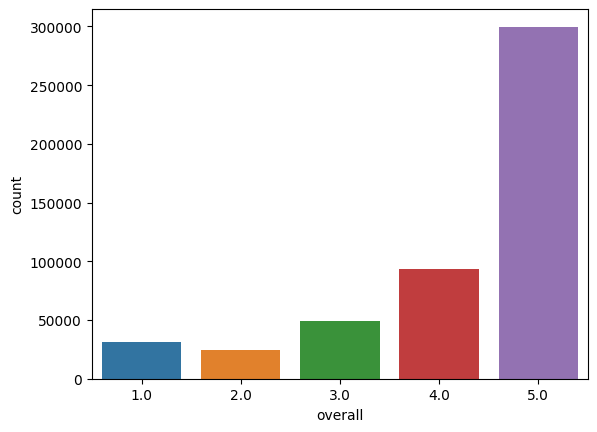

In [ ]:
sns.countplot(data = reviews_df, x='overall')

In [ ]:
len(reviews_df['asin'].value_counts(dropna=False))

17408

In [ ]:
one_1500 = reviews_df[reviews_df['overall']==1.0].sample(n=1500)
two_500 = reviews_df[reviews_df['overall']==2.0].sample(n=500)
three_500 = reviews_df[reviews_df['overall']==3.0].sample(n=500)
four_500 = reviews_df[reviews_df['overall']==4.0].sample(n=500)
five_1500 = reviews_df[reviews_df['overall']==5.0].sample(n=1500)

In [ ]:
undersampled_reviews = pd.concat([one_1500, two_500, three_500, four_500, five_1500], axis=0)

In [ ]:
undersampled_reviews['overall'].value_counts(dropna=False)

overall
1.0    1500
5.0    1500
2.0     500
3.0     500
4.0     500
Name: count, dtype: int64

<Axes: xlabel='overall', ylabel='count'>

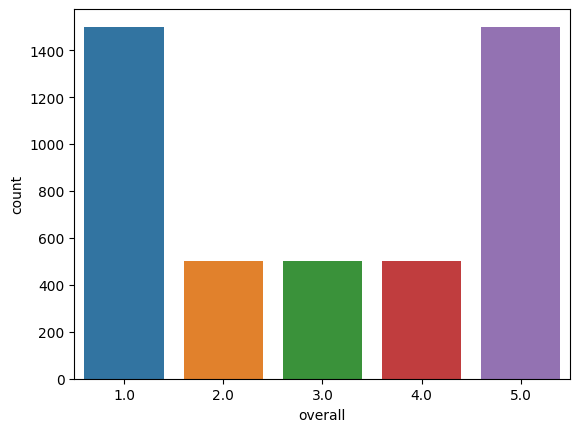

In [ ]:
sns.countplot(data=undersampled_reviews, x='overall')

In [ ]:
sample_100K_revs = reviews_df.sample(n=100000, random_state=42)

In [ ]:
undersampled_reviews.to_csv("small_corpus.csv")

In [ ]:
sample_100K_revs.to_csv("big_corpus.csv")

In [ ]:
reviews = pd.read_csv("small_corpus.csv")

In [ ]:
reviews.shape

(4500, 13)

In [ ]:
reviews.head()

,Unnamed: 0,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,36315,1.0,False,"04 5, 2003",A3F7M6QA0I304Z,B00006B5T8,Robo Stiggy,"I was excited about this game at first but found the game to be a big disappointment. Zenasaga is a much better game.\nMy biggest disappointment was game play. Graphics are poor and the dungeons are plain and boring. Bandai should take note of the game play in Kingdom Hearts.\nThe movies, however, are well done.\nA fiend broke his .hack CD. Bandai would not replace it for a small fee as other video game companies do. They wanted the full [amount].",Disappointing,1049500800,3.0,NaN,NaN
1,237089,1.0,True,"03 26, 2015",A16CHJ8LZNIZ8S,B0050SVH18,ab and cd,This is the case why not to blindly trust other reviews. This game is highly repetitive. You kill a throng of enemy and reach another area and kill another throng of enemy with zero variation and on and on. There are reasons why this game is $10 now.,This is the case why not to blindly trust other ...,1427328000,2.0,NaN,NaN
2,467054,1.0,True,"06 7, 2015",A114ZPM7ZABSI7,B000NJH6RS,Teresa Rowell,Did not work,One Star,1433635200,NaN,{'Platform:': ' PlayStation2'},NaN
3,371188,1.0,False,"06 25, 2015",A1GAXMDQNDBOCH,B00M37WR90,Araceli Moreno,This is honesty the worst bundle and game ever do not even think about buying this or actually buy this you will regret it because it sucks so much the graphics and story is horrible,Worst game ever,1435190400,NaN,{'Format:': ' Computer Game'},NaN
4,450183,1.0,False,"08 21, 2009",A20DZX38KRBIT8,B00004SVSG,Deimos,This is better then the latter MI games but it still sucks so bad it's laughable.,This sucks,1250812800,NaN,NaN,NaN


In [ ]:
reviews.dropna(subset=['reviewText'], inplace=True)


In [ ]:
reviews['swn_score'] = reviews['reviewText'].apply(lambda text : get_sentiment_score(text))

In [ ]:
reviews[['reviewText','swn_score']].sample(5)

,reviewText,swn_score
4288,"This takes me back to when video games were about fun and funky characters, pure nostalgia pop",0.694444
3099,This case is really great for protecting against damage. It's pretty strong and some space for some games. However we don't find that usefull because we donwload all our games. This is twice the price of the product I purchased on eBay. They both are great.,2.295918
4139,Delivered in as promised condition,0.000000
3783,My nephew enjoys playing this game. He was really excited when it came and played it right away. Thank you.,4.761905
3797,Pretty good headset but the x12 is a whole better. I figured after one side of my x12s quit working I would try a different kind but I made a mistake. These headphones are ok but they don't even compare a little bit to my old x12s or the px12s which was another favorite. I'm using this headset on my 360 with the old px12 cable thing and it works the sound is good but the bass doesn't come close to the x12s. The Mic on this you literally have to talk if you svc another person were 20 feet apart and trying to communicate. I've tried these on my Xbox one for about 3 seconds but got tired of yelling so the people could barely hear me and plugged in my astro a40. Another bad thing on these if you turn the Mic volume up there's an annoying static noise and that's probably why you have to yell but the chat sound is horrible. It's like listening to your friend talk thru a tin can connected to another tin can by string but 32 times worse.,0.897436


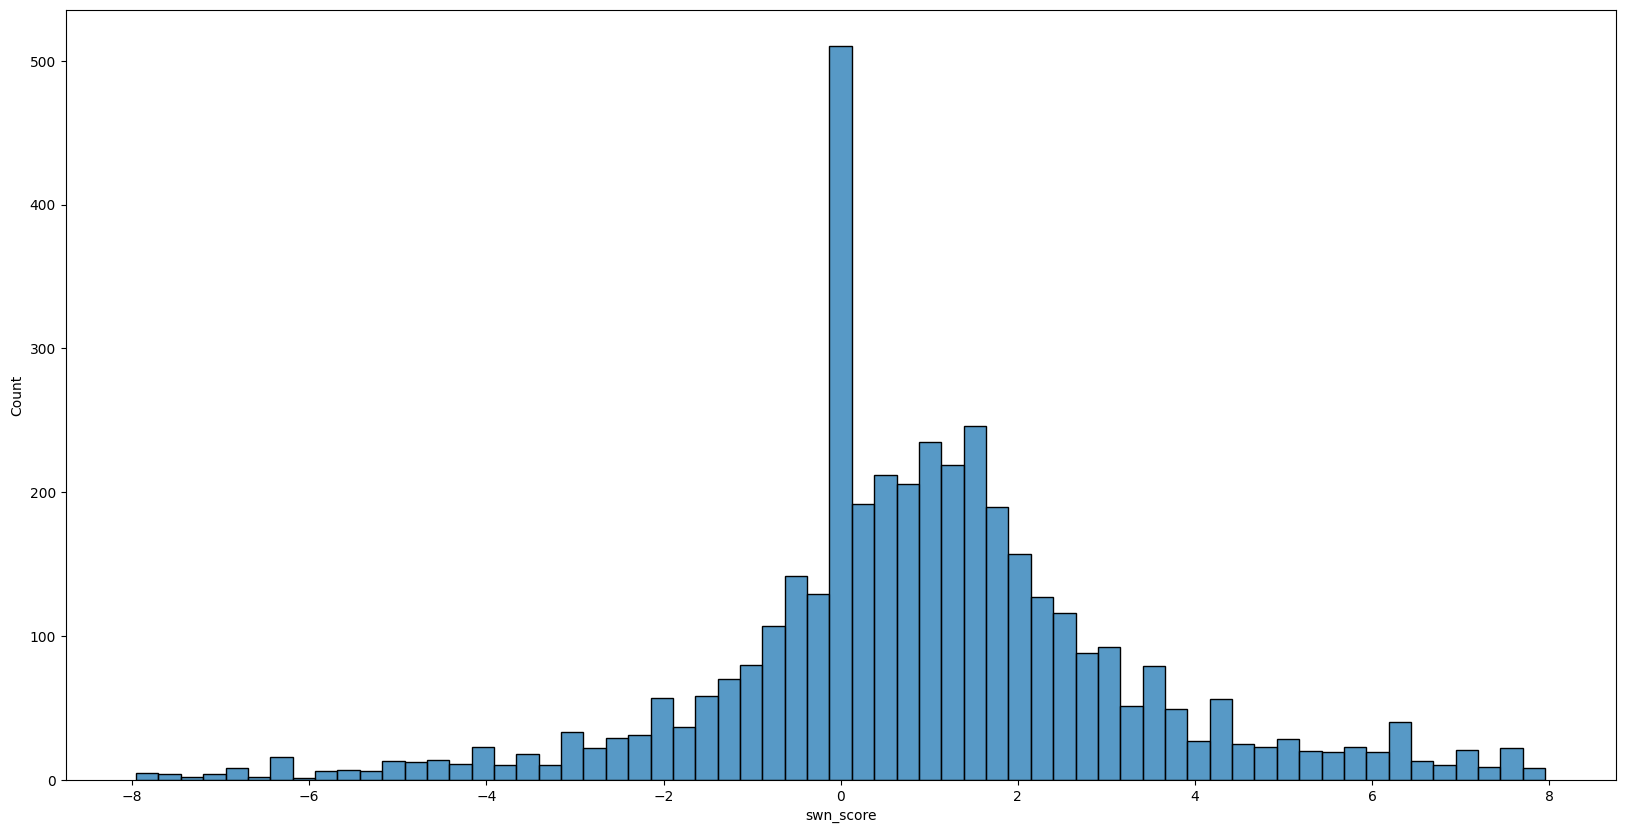

In [ ]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
sns.histplot(x='swn_score', data=reviews.query("swn_score < 8 and swn_score > -8"), ax=ax)
plt.show()

In [ ]:
reviews['swn_sentiment'] = reviews['swn_score'].apply(lambda x: "positive" if x>1 else ("negative" if x<0.5 else "neutral"))


In [ ]:
reviews['swn_sentiment'].value_counts(dropna=False)

swn_sentiment
positive    2227
negative    1846
neutral      424
Name: count, dtype: int64

<Axes: xlabel='overall', ylabel='count'>

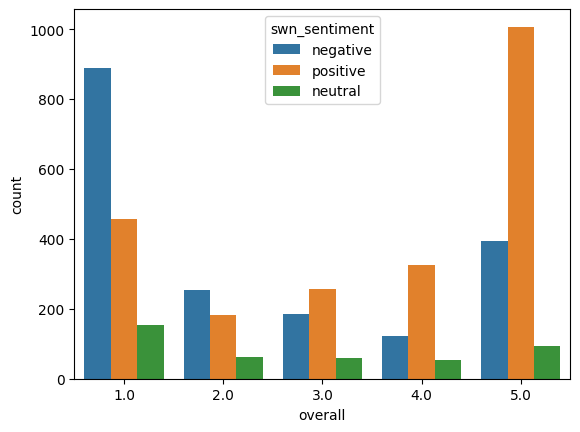

In [ ]:
sns.countplot(x='overall', hue='swn_sentiment' ,data = reviews)

<Axes: xlabel='swn_sentiment', ylabel='overall'>

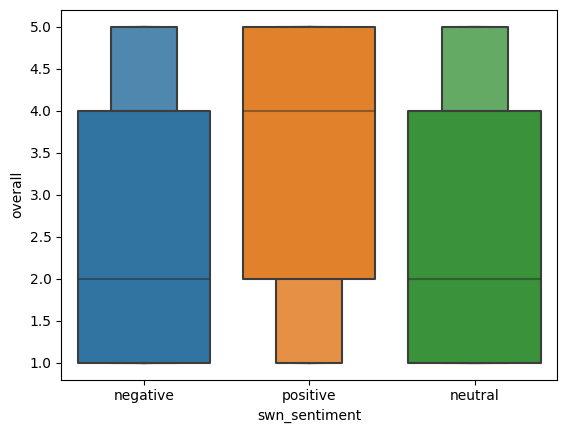

In [ ]:
sns.boxenplot(x='swn_sentiment', y='overall', data = reviews)

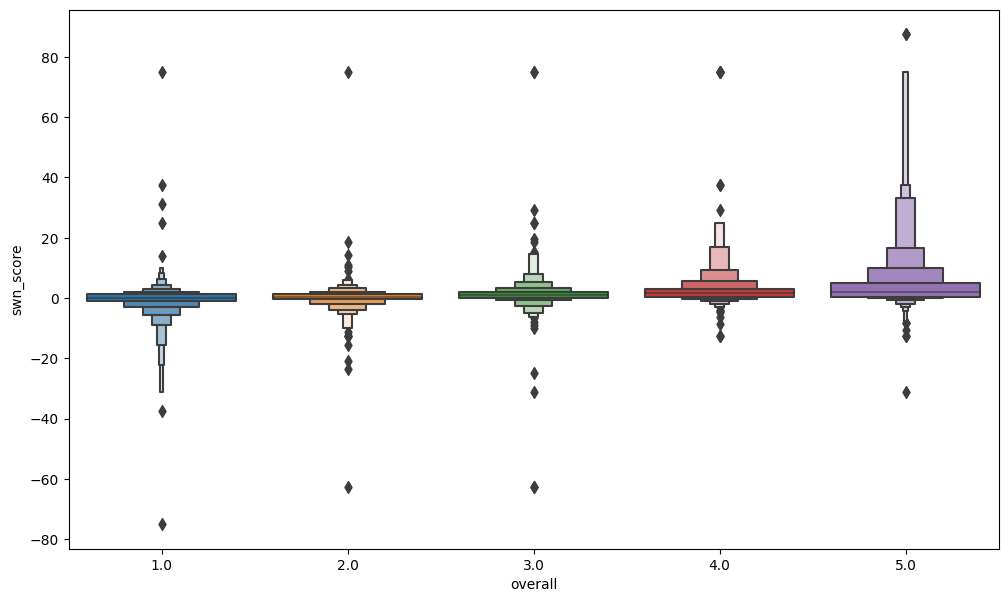

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12,7))
sns.boxenplot(x='overall', y='swn_score', data = reviews, ax=ax)
plt.show()

In [ ]:
reviews['true_sentiment'] = \
    reviews['overall'].apply(lambda x: "positive" if x>=4 else ("neutral" if x==3 else "negative"))

In [ ]:
y_swn_pred, y_true = reviews['swn_sentiment'].tolist(), reviews['true_sentiment'].tolist()

In [ ]:
len(y_swn_pred), len(y_true)

(4497, 4497)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_swn_pred)

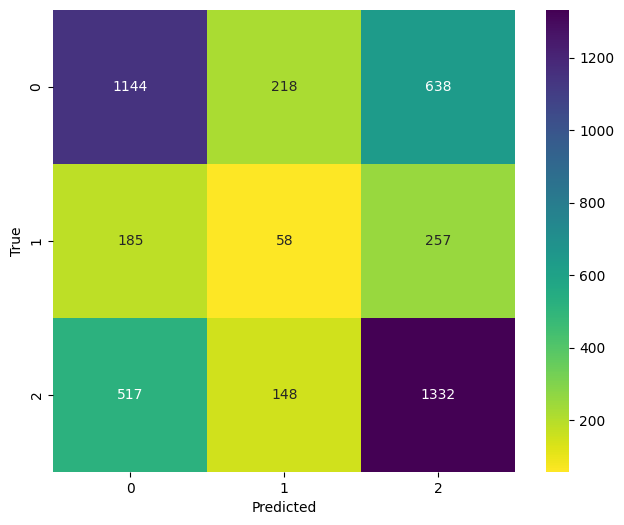

In [ ]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
sns.heatmap(cm, cmap='viridis_r', annot=True, fmt='d', square=True, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True');